<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/supplements/logreg_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

Dataset First Few Rows：
     area  perimeter  compactness  length_of_kernel  width_of_kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   asymmetry_coefficient  length_of_kernel_groove  class  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1   

Basic Information：

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------   

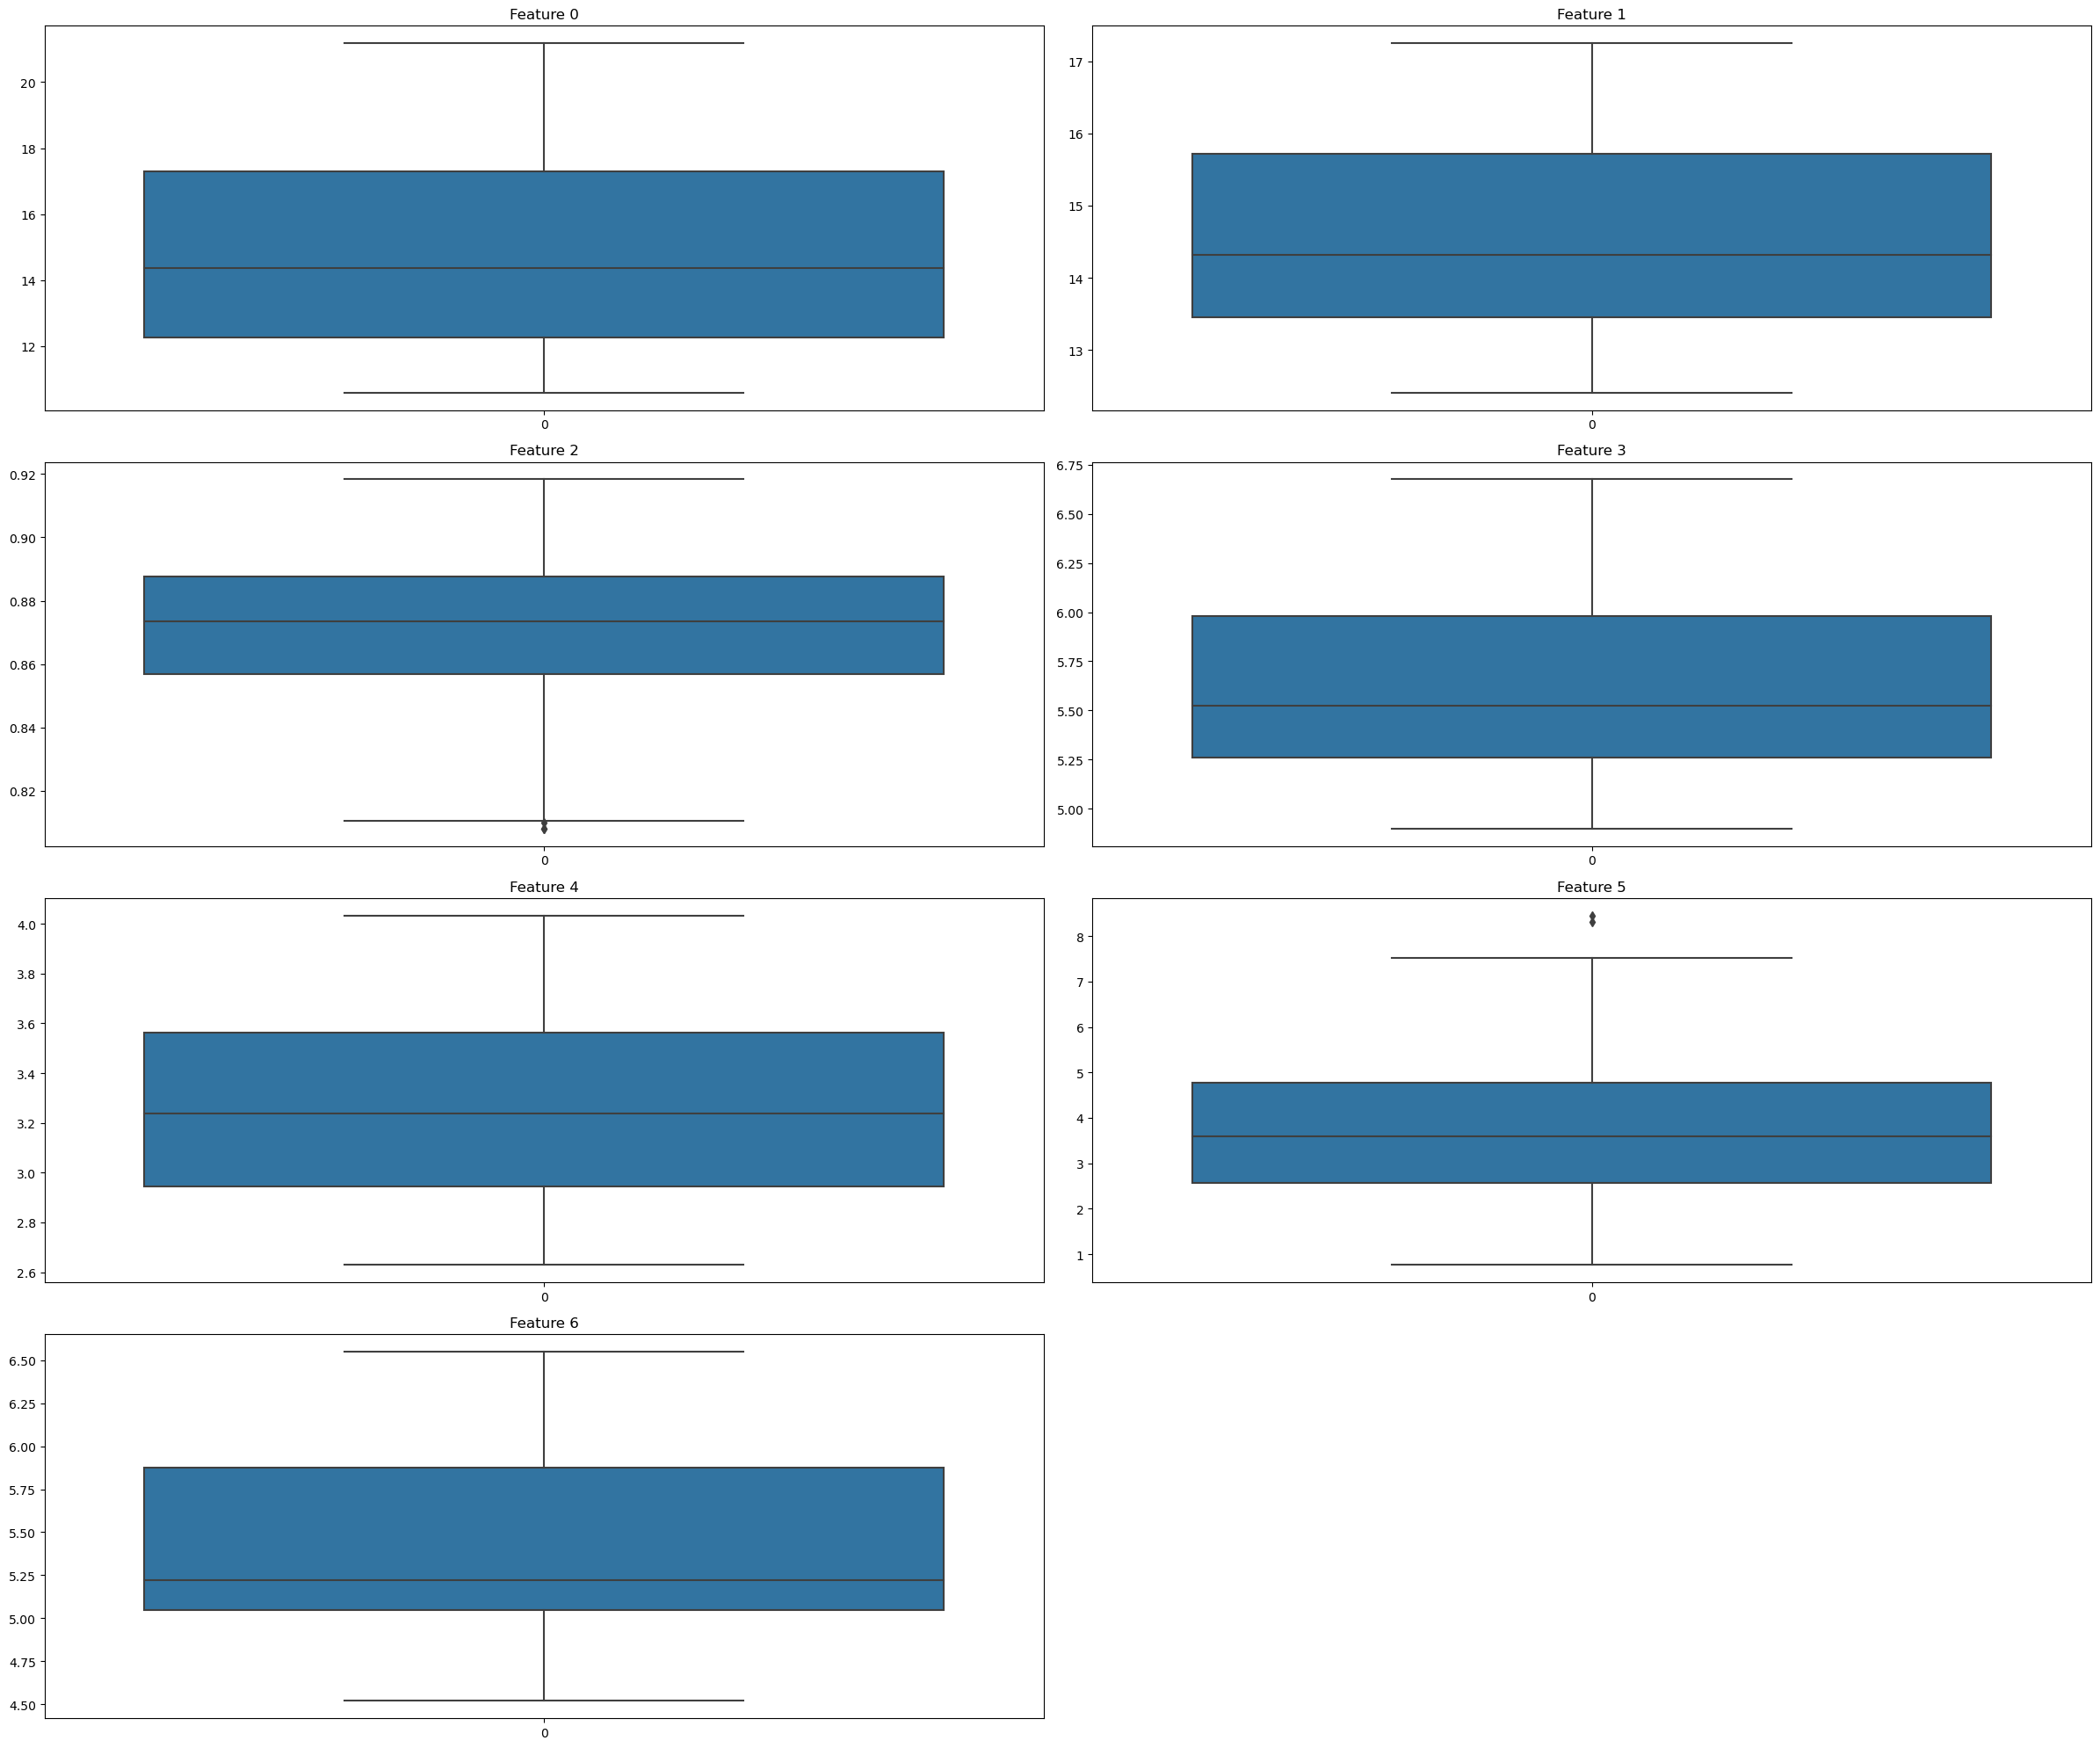

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv(r"E:\Homework\ml\Task 2 - classification\Task 2 - classification\seeds_dataset.txt", header=None, sep='\s+')
data.columns = ["area", "perimeter", "compactness", "length_of_kernel", "width_of_kernel", "asymmetry_coefficient",
                "length_of_kernel_groove", "class"]

# Output the dataset first few rows and the basic information
print("Dataset First Few Rows：\n", data.head(), "\n\nBasic Information：\n")
data.info()

# Boxplot of all features
plt.figure(figsize=(24, 20))
for i in range(data.shape[1] - 1):  # Exclude the class column from boxplot
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=data.iloc[:, i])
    plt.title(f"Feature {i}")

plt.tight_layout()
plt.show()



<Figure size 1200x1000 with 0 Axes>

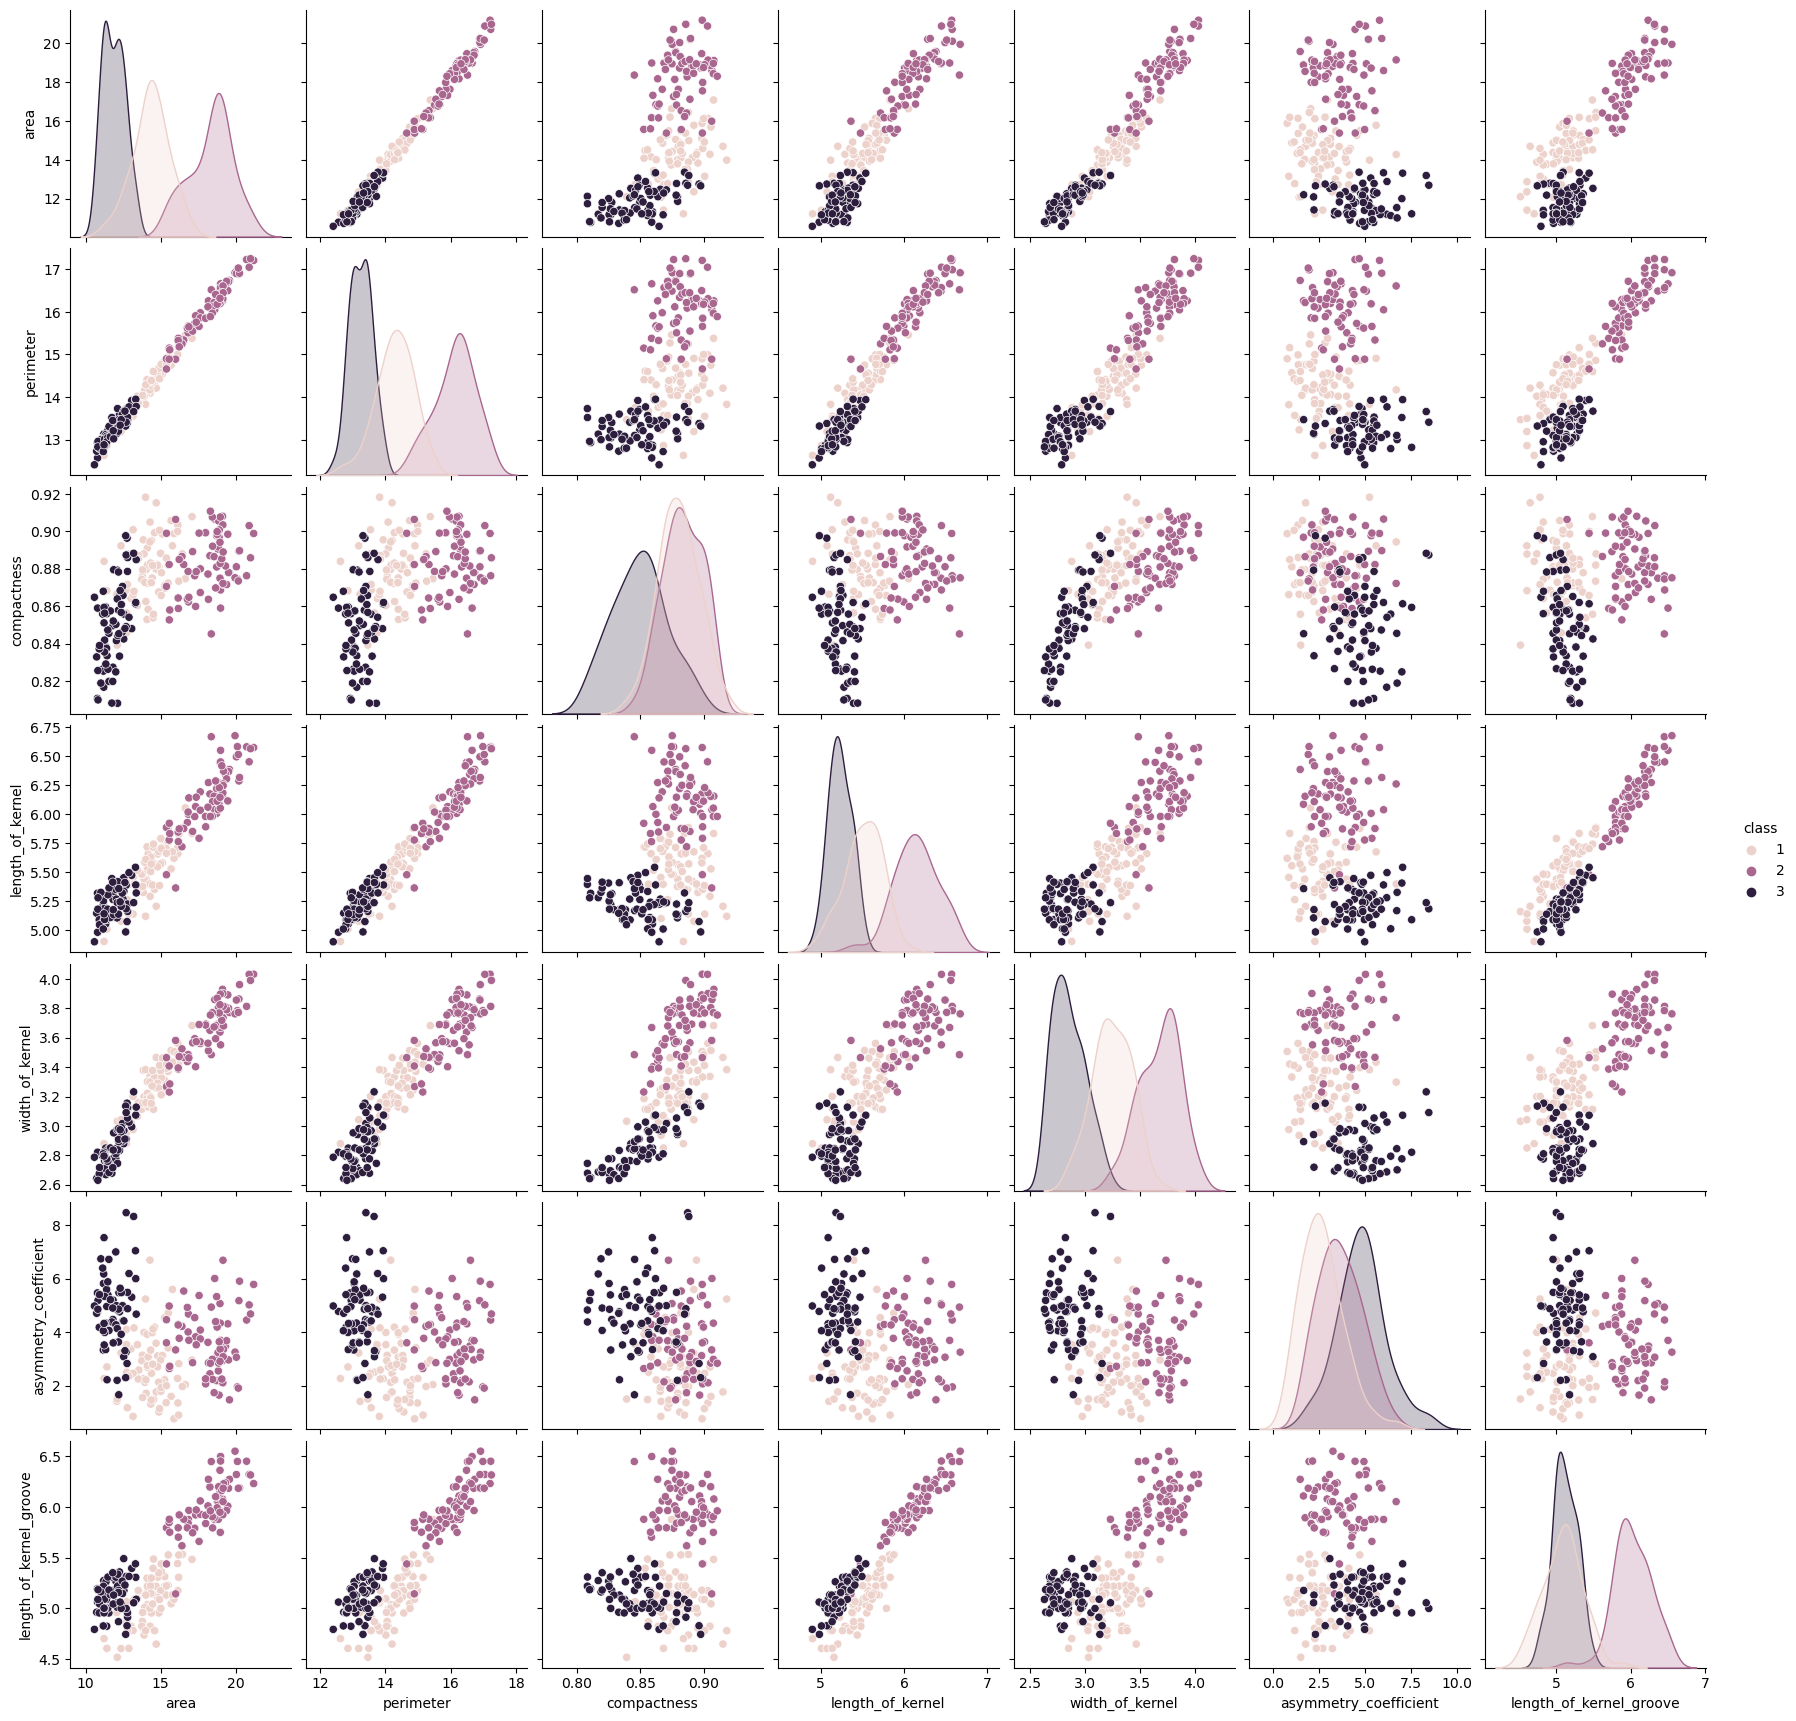

In [24]:
# Scatter plot of the training dataset by class
plt.figure(figsize=(12, 10))
sns.pairplot(data.iloc[:, :-1].join(y), hue="class")
plt.show()

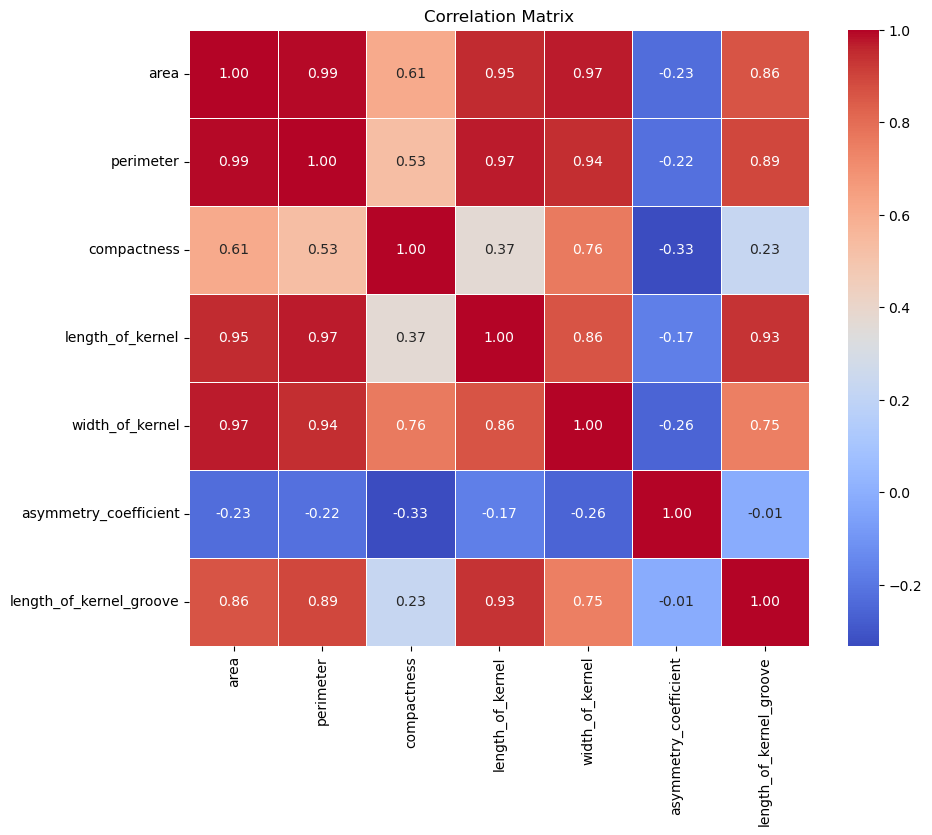

In [20]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

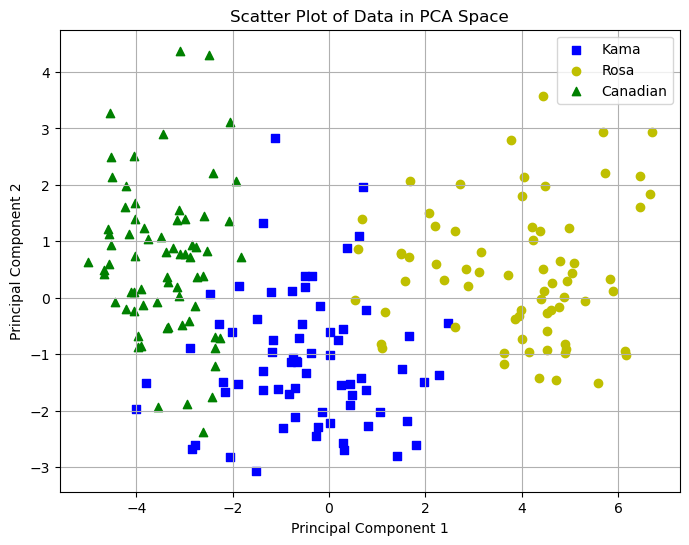

In [12]:
from sklearn.decomposition import PCA
# Extraction of features and target variables
X = data.iloc[:, :7].values
y = data.iloc[:, 7].values
# Fit PCA to the data and transform to get principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], c='b', marker='s', label='Kama')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], c='y', marker='o', label='Rosa')
plt.scatter(X_pca[y==3, 0], X_pca[y==3, 1], c='g', marker='^', label='Canadian')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data in PCA Space')
plt.legend()
plt.grid(True)
plt.show()

# Logistic regression <a class="anchor" id="logreg"></a>


Accuracy: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.96      0.93      0.94        27
           3       1.00      1.00      1.00        17

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.96        63
weighted avg       0.95      0.95      0.95        63



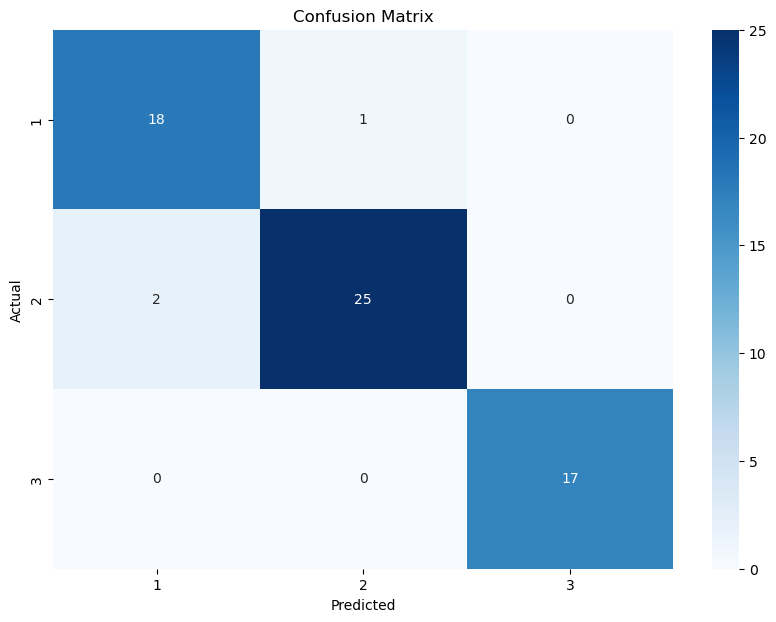

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Seeds dataset
data_path ="E:\Homework\ml\Task 2 - classification\seeds\seeds_dataset.txt"
column_names = ['area', 'perimeter', 'compactness', 'length_of_kernel', 
                'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'class']
data = pd.read_csv(data_path, sep='\s+', names=column_names)

# Split the dataset into features and target variable
X = data.iloc[:, :-1].values # Select all columns except the last as features
y = data.iloc[:, -1].values # Select the last column as the target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
